***
# *Importing Modules & Methods*

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd

import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

from sklearn.metrics.pairwise import euclidean_distances

from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from matplotlib.cm import get_cmap

***
# *Data Exploration*

#### *1. Load Dataset*

In [ ]:
data = pd.read_csv("Fifa 23 Players Data.csv")

#### *2. Exploring The Data*

In [ ]:
data.head()

,Known As,Full Name,Overall,Potential,Value(in Euro),Positions Played,Best Position,Nationality,Image Link,Age,...,LM Rating,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating
0,L. Messi,Lionel Messi,91,91,54000000,RW,CAM,Argentina,https://cdn.sofifa.net/players/158/023/23_60.png,35,...,91,88,91,67,66,67,62,53,62,22
1,K. Benzema,Karim Benzema,91,91,64000000,"CF,ST",CF,France,https://cdn.sofifa.net/players/165/153/23_60.png,34,...,89,84,89,67,67,67,63,58,63,21
2,R. Lewandowski,Robert Lewandowski,91,91,84000000,ST,ST,Poland,https://cdn.sofifa.net/players/188/545/23_60.png,33,...,86,83,86,67,69,67,64,63,64,22
3,K. De Bruyne,Kevin De Bruyne,91,91,107500000,"CM,CAM",CM,Belgium,https://cdn.sofifa.net/players/192/985/23_60.png,31,...,91,91,91,82,82,82,78,72,78,24
4,K. Mbappé,Kylian Mbappé,91,95,190500000,"ST,LW",ST,France,https://cdn.sofifa.net/players/231/747/23_60.png,23,...,92,84,92,70,66,70,66,57,66,21


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18539 entries, 0 to 18538
Data columns (total 89 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Known As                     18539 non-null  object
 1   Full Name                    18539 non-null  object
 2   Overall                      18539 non-null  int64 
 3   Potential                    18539 non-null  int64 
 4   Value(in Euro)               18539 non-null  int64 
 5   Positions Played             18539 non-null  object
 6   Best Position                18539 non-null  object
 7   Nationality                  18539 non-null  object
 8   Image Link                   18539 non-null  object
 9   Age                          18539 non-null  int64 
 10  Height(in cm)                18539 non-null  int64 
 11  Weight(in kg)                18539 non-null  int64 
 12  TotalStats                   18539 non-null  int64 
 13  BaseStats                    18

In [ ]:
data.describe()

,Overall,Potential,Value(in Euro),Age,Height(in cm),Weight(in kg),TotalStats,BaseStats,Wage(in Euro),Release Clause,...,LM Rating,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating
count,18539.000000,18539.000000,1.853900e+04,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,1.853900e+04,...,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000
mean,65.852042,71.016668,2.875461e+06,25.240412,181.550839,75.173904,1602.114569,357.946221,8824.537462,5.081688e+06,...,58.451319,57.374076,58.451319,56.281569,55.928583,56.281569,55.650251,54.528184,55.650251,23.257134
std,6.788353,6.192866,7.635129e+06,4.718163,6.858097,7.013593,273.160237,39.628259,19460.531154,1.467203e+07,...,13.987122,13.171194,13.987122,13.903836,13.872190,13.903836,14.159466,14.743929,14.159466,15.108925
min,47.000000,48.000000,0.000000e+00,16.000000,155.000000,49.000000,759.000000,224.000000,0.000000,0.000000e+00,...,18.000000,18.000000,18.000000,17.000000,19.000000,17.000000,17.000000,18.000000,17.000000,10.000000
25%,62.000000,67.000000,4.750000e+05,21.000000,177.000000,70.000000,1470.000000,331.000000,1000.000000,6.650000e+05,...,54.000000,53.000000,54.000000,51.000000,48.000000,51.000000,49.000000,45.000000,49.000000,17.000000
50%,66.000000,71.000000,1.000000e+06,25.000000,182.000000,75.000000,1640.000000,358.000000,3000.000000,1.500000e+06,...,62.000000,60.000000,62.000000,59.000000,59.000000,59.000000,59.000000,58.000000,59.000000,18.000000
75%,70.000000,75.000000,2.000000e+06,29.000000,186.000000,80.000000,1786.000000,385.000000,8000.000000,3.400000e+06,...,67.000000,66.000000,67.000000,66.000000,66.000000,66.000000,65.000000,66.000000,65.000000,20.000000
max,91.000000,95.000000,1.905000e+08,44.000000,206.000000,105.000000,2312.000000,502.000000,450000.000000,3.667000e+08,...,92.000000,91.000000,92.000000,88.000000,89.000000,88.000000,87.000000,90.000000,87.000000,90.000000


In [ ]:
data.isnull().sum()

Known As          0
Full Name         0
Overall           0
Potential         0
Value(in Euro)    0
                 ..
RWB Rating        0
LB Rating         0
CB Rating         0
RB Rating         0
GK Rating         0
Length: 89, dtype: int64

#### *3. Finding Only The Numeric Data*

In [ ]:
high_rated_players = data[data['Overall'] >= 85]

# Discard non-numeric features
numeric_data = high_rated_players.select_dtypes(include=['float64', 'int64'])

#### *4. Exploring The Numeric Data*

In [ ]:
numeric_data.head()

,Overall,Potential,Value(in Euro),Age,Height(in cm),Weight(in kg),TotalStats,BaseStats,Wage(in Euro),Release Clause,...,LM Rating,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating
0,91,91,54000000,35,169,67,2190,452,195000,99900000,...,91,88,91,67,66,67,62,53,62,22
1,91,91,64000000,34,185,81,2147,455,450000,131199999,...,89,84,89,67,67,67,63,58,63,21
2,91,91,84000000,33,185,81,2205,458,420000,172200000,...,86,83,86,67,69,67,64,63,64,22
3,91,91,107500000,31,181,70,2303,483,350000,198900000,...,91,91,91,82,82,82,78,72,78,24
4,91,95,190500000,23,182,73,2177,470,230000,366700000,...,92,84,92,70,66,70,66,57,66,21


In [ ]:
numeric_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91 entries, 0 to 90
Data columns (total 71 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Overall                   91 non-null     int64
 1   Potential                 91 non-null     int64
 2   Value(in Euro)            91 non-null     int64
 3   Age                       91 non-null     int64
 4   Height(in cm)             91 non-null     int64
 5   Weight(in kg)             91 non-null     int64
 6   TotalStats                91 non-null     int64
 7   BaseStats                 91 non-null     int64
 8   Wage(in Euro)             91 non-null     int64
 9   Release Clause            91 non-null     int64
 10  Joined On                 91 non-null     int64
 11  Weak Foot Rating          91 non-null     int64
 12  Skill Moves               91 non-null     int64
 13  International Reputation  91 non-null     int64
 14  Pace Total                91 non-null     in

As you can see there is no missing value

In [ ]:
data.describe()

,Overall,Potential,Value(in Euro),Age,Height(in cm),Weight(in kg),TotalStats,BaseStats,Wage(in Euro),Release Clause,...,LM Rating,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating
count,18539.000000,18539.000000,1.853900e+04,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,1.853900e+04,...,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000
mean,65.852042,71.016668,2.875461e+06,25.240412,181.550839,75.173904,1602.114569,357.946221,8824.537462,5.081688e+06,...,58.451319,57.374076,58.451319,56.281569,55.928583,56.281569,55.650251,54.528184,55.650251,23.257134
std,6.788353,6.192866,7.635129e+06,4.718163,6.858097,7.013593,273.160237,39.628259,19460.531154,1.467203e+07,...,13.987122,13.171194,13.987122,13.903836,13.872190,13.903836,14.159466,14.743929,14.159466,15.108925
min,47.000000,48.000000,0.000000e+00,16.000000,155.000000,49.000000,759.000000,224.000000,0.000000,0.000000e+00,...,18.000000,18.000000,18.000000,17.000000,19.000000,17.000000,17.000000,18.000000,17.000000,10.000000
25%,62.000000,67.000000,4.750000e+05,21.000000,177.000000,70.000000,1470.000000,331.000000,1000.000000,6.650000e+05,...,54.000000,53.000000,54.000000,51.000000,48.000000,51.000000,49.000000,45.000000,49.000000,17.000000
50%,66.000000,71.000000,1.000000e+06,25.000000,182.000000,75.000000,1640.000000,358.000000,3000.000000,1.500000e+06,...,62.000000,60.000000,62.000000,59.000000,59.000000,59.000000,59.000000,58.000000,59.000000,18.000000
75%,70.000000,75.000000,2.000000e+06,29.000000,186.000000,80.000000,1786.000000,385.000000,8000.000000,3.400000e+06,...,67.000000,66.000000,67.000000,66.000000,66.000000,66.000000,65.000000,66.000000,65.000000,20.000000
max,91.000000,95.000000,1.905000e+08,44.000000,206.000000,105.000000,2312.000000,502.000000,450000.000000,3.667000e+08,...,92.000000,91.000000,92.000000,88.000000,89.000000,88.000000,87.000000,90.000000,87.000000,90.000000


In [ ]:
data.isnull().sum()

Known As          0
Full Name         0
Overall           0
Potential         0
Value(in Euro)    0
                 ..
RWB Rating        0
LB Rating         0
CB Rating         0
RB Rating         0
GK Rating         0
Length: 89, dtype: int64

As you can see there is no null feature value

#### *5. Saving Features: Known As & Best Position*

In [ ]:
best_position_feature = data['Best Position']
Known_As_feature = data['Known As']

***
# *a.*

#### *1. Normalization*

In [ ]:
scaler = StandardScaler()
normalized_data = scaler.fit_transform(numeric_data)
normalized_data = pd.DataFrame(normalized_data)

In [ ]:
normalized_data.head()

,0,1,2,3,4,5,6,7,8,9,...,61,62,63,64,65,66,67,68,69,70
0,2.257085,1.252100,-0.489803,1.572667,-1.838418,-1.289619,0.612086,-0.189775,0.401156,-0.472748,...,0.898800,0.798942,0.898800,-0.115226,-0.237193,-0.115226,-0.306332,-0.647923,-0.306332,-0.443822
1,2.257085,1.252100,-0.169486,1.307644,0.294440,0.359954,0.469716,-0.042592,3.680065,0.018166,...,0.785830,0.548886,0.785830,-0.115226,-0.177567,-0.115226,-0.249557,-0.375712,-0.249557,-0.483380
2,2.257085,1.252100,0.471147,1.042620,0.294440,0.359954,0.661750,0.104592,3.294311,0.661217,...,0.616373,0.486372,0.616373,-0.115226,-0.058315,-0.115226,-0.192783,-0.103500,-0.192783,-0.443822
3,2.257085,1.252100,1.223891,0.512573,-0.238775,-0.936139,0.986222,1.331121,2.394218,1.079984,...,0.898800,0.986484,0.898800,0.748966,0.716821,0.748966,0.602057,0.386481,0.602057,-0.364708
4,2.257085,2.897458,3.882520,-1.607615,-0.105471,-0.582659,0.569044,0.693326,0.851202,3.711788,...,0.955286,0.548886,0.955286,0.057613,-0.237193,0.057613,-0.079234,-0.430154,-0.079234,-0.483380


#### *2. Applying PCA*

In [ ]:
#As you expected we have diminished the dataset with PCA method
pca = PCA(n_components=2)
pca_result = pca.fit_transform(normalized_data)

#### *3. Creating a new dataframe with the PCA results*

In [ ]:
#Our new dataset has only two feature: PC1, PC2
pca_data = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])

In [ ]:
pca_data.head()

,PC1,PC2
0,-4.302721,-5.838089
1,-3.404468,-3.642608
2,-3.445533,-2.892311
3,-5.267533,-2.113332
4,-4.307196,-4.929756


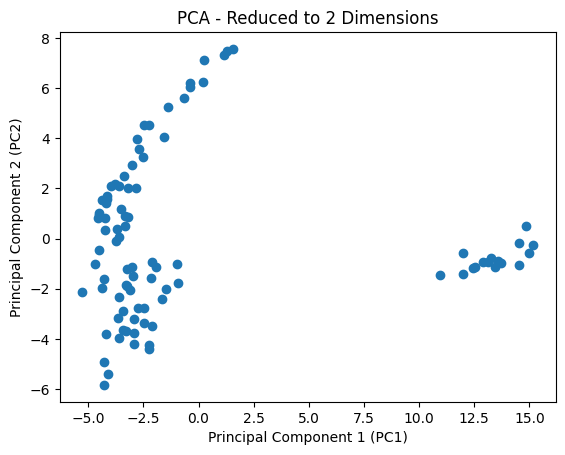

In [ ]:
#Visualizing new dataset
plt.scatter(pca_data['PC1'], pca_data['PC2'])
plt.title('PCA - Reduced to 2 Dimensions')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.show()

***
# *b.*

#### *1. Performing K-Means Clustering*

In [ ]:
#As you expect I've used kmeans with k = 5
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(pca_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5, random_state=0)

#### *2. Adding Cluster Labels To The PCA Dataframe*

In [ ]:
cluster_labels = kmeans.labels_
pca_data['Cluster'] = cluster_labels

In [ ]:
pca_data.head()

,PC1,PC2,Cluster
0,-4.302721,-5.838089,4
1,-3.404468,-3.642608,4
2,-3.445533,-2.892311,4
3,-5.267533,-2.113332,2
4,-4.307196,-4.929756,4


#### *3. Visualizing Clusters With Players' Names*

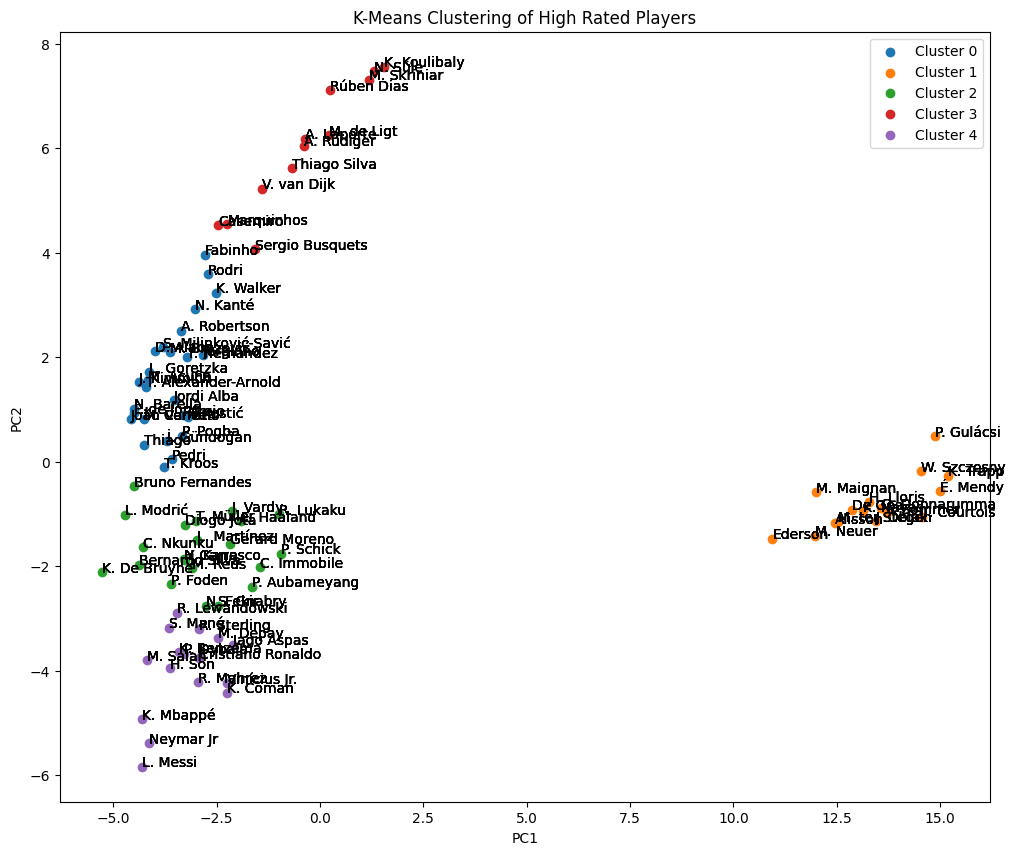

In [ ]:
#Visualizing the clustering with plot and player's names
plt.figure(figsize=(12, 10))

for label in range(5):
    cluster_points = pca_data[cluster_labels == label]
    plt.scatter(cluster_points['PC1'], cluster_points['PC2'], label=f'Cluster {label}')

    #Assining player's names
    for i in range(len(high_rated_players)):
        player = Known_As_feature.iloc[i]
        plt.text(pca_result[i, 0], pca_result[i, 1], player)

plt.title('K-Means Clustering of High Rated Players')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

***
# *c.*

#### *1. Comparability Of Mbappé To Ronaldo & Messi*

In [ ]:
players_of_interest = ['K. Mbappé', 'L. Messi', 'Cristiano Ronaldo']

#Finding each players coordinates(pc1, pc2)
player_coordinates = {}
for player_name in players_of_interest:
    player_index = high_rated_players[high_rated_players['Known As'] == player_name].index[0]
    player_coordinate = pca_result[player_index, :]
    player_coordinates[player_name] = player_coordinate

distances_matrix = euclidean_distances(list(player_coordinates.values()))

print("Euclidean Distances:")
for i, player1 in enumerate(players_of_interest):
    for j, player2 in enumerate(players_of_interest):
        if i != j:
            dist = distances_matrix[i, j]
            print(f"{player1} to {player2}: {dist:.2f}")

mbappe_to_ronaldo = distances_matrix[0, 2]
mbappe_to_messi = distances_matrix[0, 1]

print("\nComparison:")
if mbappe_to_ronaldo < mbappe_to_messi:
    print(" Mbappé's style is closer to Ronaldo than Messi.")
else:
    print(" Mbappé's style is closer to Messi than Ronaldo.")

Euclidean Distances:
K. Mbappé to L. Messi: 0.91
K. Mbappé to Cristiano Ronaldo: 1.82
L. Messi to K. Mbappé: 0.91
L. Messi to Cristiano Ronaldo: 2.50
Cristiano Ronaldo to K. Mbappé: 1.82
Cristiano Ronaldo to L. Messi: 2.50

Comparison:
 Mbappé's style is closer Messi than Ronaldo.


#### *2. Finding Taremi's Predicted Cluster*

In [ ]:
#Taremi is not in our working dataset becuase his overall is less than 85
#So we should add his information to the working dataset inorder to compare
#him with messi amd ronaldo

taremi_data = data[data['Known As'] == 'M. Taremi'].copy()
taremi_numeric_data = taremi_data.select_dtypes(include=['float64', 'int64'])
taremi_numeric_data.head()

,Overall,Potential,Value(in Euro),Age,Height(in cm),Weight(in kg),TotalStats,BaseStats,Wage(in Euro),Release Clause,...,LM Rating,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating
296,81,81,25500000,29,186,83,1959,422,22000,51000000,...,81,76,81,62,60,62,59,53,59,20


In [ ]:
# Normalizing taremi
taremi_normalized_data = scaler.transform(taremi_numeric_data)
taremi_normalized_data = pd.DataFrame(taremi_normalized_data, columns=taremi_numeric_data.columns)
taremi_normalized_data.head()

,Overall,Potential,Value(in Euro),Age,Height(in cm),Weight(in kg),TotalStats,BaseStats,Wage(in Euro),Release Clause,...,LM Rating,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating
0,-3.249477,-2.861296,-1.402706,-0.017474,0.427743,0.595607,-0.15274,-1.66161,-1.823359,-1.239704,...,0.333947,0.048775,0.333947,-0.403289,-0.594949,-0.403289,-0.476655,-0.647923,-0.476655,-0.522937


In [ ]:
taremi_pca_result = pca.transform(taremi_normalized_data)
taremi_pca_data = pd.DataFrame(data=taremi_pca_result, columns=['PC1', 'PC2'])
taremi_pca_data.head()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


,PC1,PC2
0,-0.881976,-1.243686


In [ ]:
taremi_cluster = kmeans.predict(taremi_pca_data)[0]

print(f'Predicted cluster for M. Taremi: {taremi_cluster}')

Predicted cluster for M. Taremi: 2


#### *3. Comparability Of Taremi To Ronaldo & Messi*

In [ ]:
taremi_coordinates = taremi_pca_result[0, :]

messi_coordinates = player_coordinates['L. Messi']
ronaldo_coordinates = player_coordinates['Cristiano Ronaldo']

all_coordinates = [messi_coordinates, ronaldo_coordinates, taremi_coordinates]

distances_matrix_taremi = euclidean_distances(all_coordinates)

dist_between_taremi_and_messi = distances_matrix_taremi[2, 0]
dist_between_taremi_and_ronaldo = distances_matrix_taremi[2, 1]

print("Euclidean Distances:")
print(f"M. Taremi to Messi: {dist_between_taremi_and_messi:.2f}")
print(f"M. Taremi to Ronaldo: {dist_between_taremi_and_ronaldo:.2f}")

print("\nComparison:")
if dist_between_taremi_and_messi < dist_between_taremi_and_ronaldo:
    print('M. Taremi\'s style is closer to Messi.')
elif dist_between_taremi_and_ronaldo < dist_between_taremi_and_messi:
    print('M. Taremi\'s style is closer to Ronaldo.')
else:
    print('M. Taremi is equally close to Messi and Ronaldo.')

Euclidean Distances:
M. Taremi to Messi: 5.73
M. Taremi to Ronaldo: 3.24

Comparison:
M. Taremi is closer to Ronaldo.


***
# *d.*

#### *1. Load Dataset*

In [ ]:
data = pd.read_csv("Fifa 23 Players Data.csv")

In [ ]:
data = pd.read_csv("Fifa 23 Players Data.csv")

In [ ]:
data.head()

,Known As,Full Name,Overall,Potential,Value(in Euro),Positions Played,Best Position,Nationality,Image Link,Age,...,LM Rating,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating
0,L. Messi,Lionel Messi,91,91,54000000,RW,CAM,Argentina,https://cdn.sofifa.net/players/158/023/23_60.png,35,...,91,88,91,67,66,67,62,53,62,22
1,K. Benzema,Karim Benzema,91,91,64000000,"CF,ST",CF,France,https://cdn.sofifa.net/players/165/153/23_60.png,34,...,89,84,89,67,67,67,63,58,63,21
2,R. Lewandowski,Robert Lewandowski,91,91,84000000,ST,ST,Poland,https://cdn.sofifa.net/players/188/545/23_60.png,33,...,86,83,86,67,69,67,64,63,64,22
3,K. De Bruyne,Kevin De Bruyne,91,91,107500000,"CM,CAM",CM,Belgium,https://cdn.sofifa.net/players/192/985/23_60.png,31,...,91,91,91,82,82,82,78,72,78,24
4,K. Mbappé,Kylian Mbappé,91,95,190500000,"ST,LW",ST,France,https://cdn.sofifa.net/players/231/747/23_60.png,23,...,92,84,92,70,66,70,66,57,66,21


#### *2. Finding Only The Numeric Data*

In [ ]:
numeric_data = data.select_dtypes(include=['float64', 'int64'])

#### *3. Saving Features: Known As & Best Position & Player Ratings*

In [ ]:
best_position_feature = data['Best Position']
Known_As_feature = data['Known As']

#### *4. Normalization*

In [ ]:
scaler = StandardScaler()
normalized_data = scaler.fit_transform(numeric_data)
normalized_data = pd.DataFrame(normalized_data)

In [ ]:
normalized_data.head()

,0,1,2,3,4,5,6,7,8,9,...,61,62,63,64,65,66,67,68,69,70
0,3.704674,3.226918,6.696143,2.068570,-1.830125,-1.165469,2.152221,2.373466,9.567081,6.462694,...,2.327109,2.325283,2.327109,0.770918,0.726034,0.770918,0.448458,-0.103651,0.448458,-0.083207
1,3.704674,3.226918,8.005914,1.856618,0.502946,0.830709,1.994800,2.449171,22.670880,8.596061,...,2.184117,2.021581,2.184117,0.770918,0.798123,0.770918,0.519084,0.235481,0.519084,-0.149395
2,3.704674,3.226918,10.625456,1.644665,0.502946,0.830709,2.207136,2.524877,21.129256,11.390569,...,1.969628,1.945656,1.969628,0.770918,0.942300,0.770918,0.589710,0.574612,0.589710,-0.083207
3,3.704674,3.226918,13.703418,1.220760,-0.080322,-0.737716,2.565909,3.155757,17.532135,13.210406,...,2.327109,2.553059,2.327109,1.849786,1.879452,1.849786,1.578474,1.185050,1.578474,0.049169
4,3.704674,3.872840,24.574516,-0.474861,0.065495,-0.309964,2.104629,2.827699,11.365642,24.647438,...,2.398605,2.021581,2.398605,0.986692,0.726034,0.986692,0.730962,0.167654,0.730962,-0.149395


#### *5. Applying PCA*

In [ ]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(normalized_data)

#### *6. Creating a new dataframe with the PCA results*

In [ ]:
pca_data = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])

In [ ]:
pca_data.head()

,PC1,PC2
0,-13.894015,10.066310
1,-13.842271,8.608881
2,-14.089068,8.278501
3,-16.172213,6.995771
4,-15.729872,10.882444


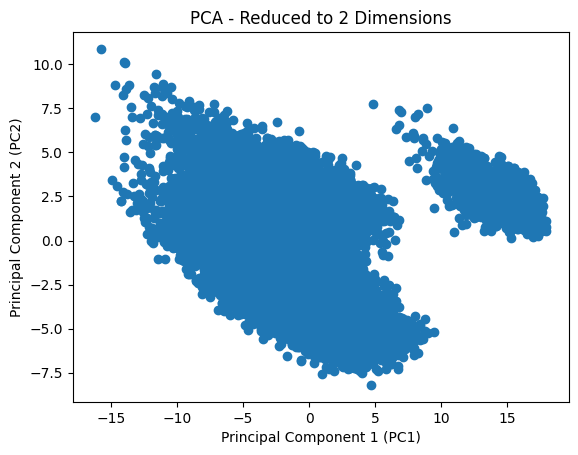

In [ ]:
plt.scatter(pca_data['PC1'], pca_data['PC2'])
plt.title('PCA - Reduced to 2 Dimensions')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.show()

#### *7. Encoding the 'Best Position' labels into numerical values*

In [ ]:
label_encoder = LabelEncoder()
best_position_feature_encoded = label_encoder.fit_transform(best_position_feature)

#### *8. Performing K-Means Clustering*

In [ ]:
kmeans = KMeans(n_clusters=16, random_state=0)
predicted_clusters = kmeans.fit_predict(pca_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


#### *9. Adding Cluster Labels To The PCA Dataframe*

In [ ]:
cluster_labels = kmeans.labels_
pca_data['Cluster'] = cluster_labels

In [ ]:
pca_data.head()

,PC1,PC2,Cluster
0,-13.894015,10.066310,8
1,-13.842271,8.608881,8
2,-14.089068,8.278501,8
3,-16.172213,6.995771,8
4,-15.729872,10.882444,8


<ipython-input-45-21bcb48028b1>:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap('tab20')


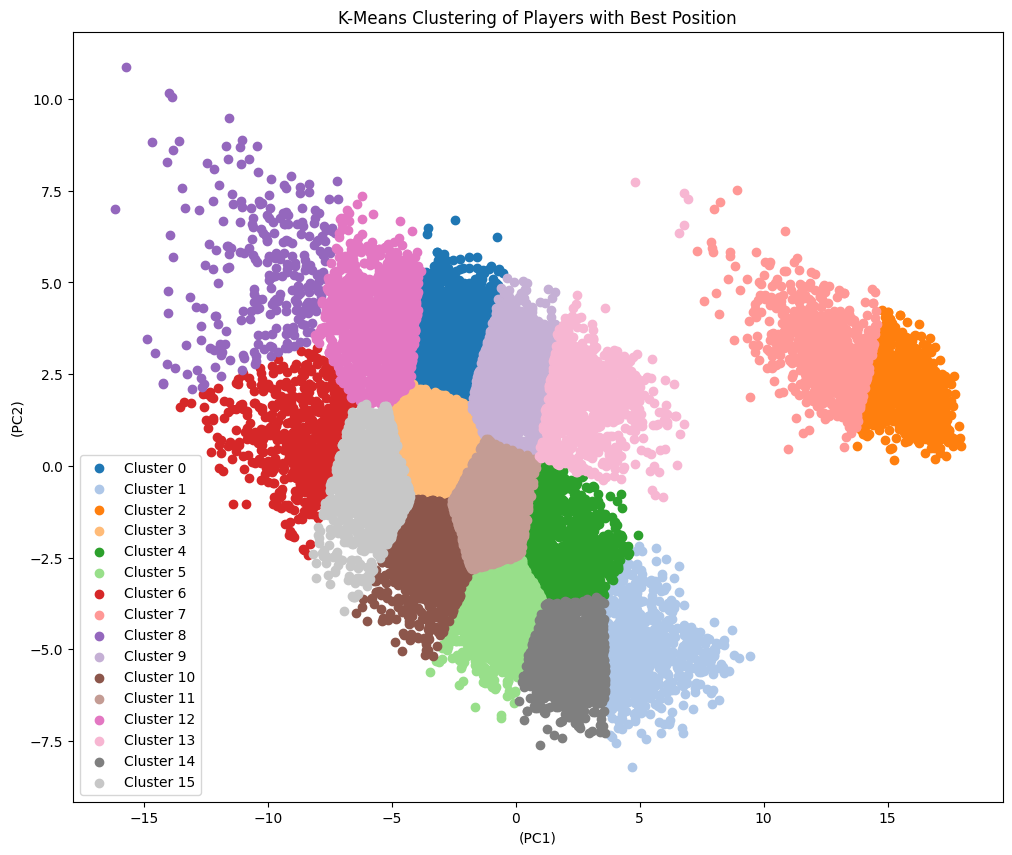

In [ ]:
plt.figure(figsize=(12, 10))
cmap = get_cmap('tab20')

for label in range(16):
    cluster_points = pca_data[pca_data['Cluster'] == label]
    plt.scatter(cluster_points['PC1'], cluster_points['PC2'], label=f'Cluster {label}', color=cmap(label))

plt.title('K-Means Clustering of Players with Best Position')
plt.xlabel('(PC1)')
plt.ylabel('(PC2)')
plt.legend()
plt.show()

#### *10. Calculate clustering accuracy*

In [ ]:
accuracy = accuracy_score(best_position_feature_encoded, predicted_clusters)

In [ ]:
print(f'Clustering Accuracy: {accuracy:.2%}\n')

# Find positions present in both original labels and predicted clusters
common_positions = np.intersect1d(np.unique(best_position_feature_encoded), np.unique(predicted_clusters))

# Calculate clustering accuracy for each common position
for position in common_positions:
    position_indices = (best_position_feature_encoded == position)
    position_accuracy = accuracy_score(best_position_feature_encoded[position_indices], predicted_clusters[position_indices])
    print(f'Accuracy for Position {label_encoder.inverse_transform([position])[0]}: {position_accuracy:.2%}')

Clustering Accuracy: 8.12%

Accuracy for Position CAM: 15.23%
Accuracy for Position CB: 18.15%
Accuracy for Position CDM: 0.00%
Accuracy for Position CF: 4.29%
Accuracy for Position CM: 4.89%
Accuracy for Position GK: 0.00%
Accuracy for Position LB: 5.90%
Accuracy for Position LM: 0.00%
Accuracy for Position LW: 8.84%
Accuracy for Position LWB: 0.00%
Accuracy for Position RB: 20.76%
Accuracy for Position RM: 7.07%
Accuracy for Position RW: 22.90%
Accuracy for Position RWB: 0.00%
Accuracy for Position ST: 0.00%


As you can see the best accuracy happens in the cluster which is attached to 'position RW' with 22.90%.